## Домашнее задание №2

Выполнила **Гурова Наталия группа ML-12**

02.11.21

In [82]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook

In [83]:
data = pd.read_csv('weather.csv')

In [84]:
data.head(5)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [85]:
del data['Unnamed: 0']

### Распарсим дату

In [86]:
data[['Year', 'Month', 'Day']] = data['Date'].str.split('-', expand=True)

In [87]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,01
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,02
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,03
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,04
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,1021.2,NaN,NaN,9.4,20.9,No,No,2017,06,20
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,06,21
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,06,22
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,06,23


In [7]:
from sklearn.model_selection import train_test_split

In [88]:
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow'].replace({'No' : 0, 'Yes' : 1})

### Заполняем пропуски в данных 

In [89]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

**Числовые признаки**

In [90]:
num_data = X.select_dtypes([np.number])

In [91]:
num_columns = num_data.columns

In [92]:
num_data_mean = num_data.mean()

In [93]:
X = X.fillna(num_data_mean)

**Категориальные признаки**

In [94]:
cat_data = X.select_dtypes(exclude=[np.number])

In [95]:
cat_columns = cat_data.columns

In [48]:
# заполнение самым популярным значением
# for column in cat_data.columns.drop(['Date']):
#     cat_data_popul = cat_data[column].value_counts()[0]
#     X_train[column] = cat_data[column].fillna(value=cat_data_popul)
#     X_test[column] = X_test[column].fillna(value=cat_data_popul)

In [96]:
X[cat_columns] = X[cat_columns].fillna("NotGiven")

**Проверим, что нет пропущенных значений**

In [97]:
X.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler

In [53]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[num_data.columns])
# X_test_scaled = scaler.transform(X_test[num_data.columns])

In [54]:
# from sklearn.linear_model import Ridge
# def show_weights(features, weights, scales):
#     fig, axs = plt.subplots(figsize=(7, 5), ncols=2)
#     sorted_weights = sorted(zip(weights, features, scales), reverse=True)
#     weights = [x[0] for x in sorted_weights]
#     features = [x[1] for x in sorted_weights]
#     scales = [x[2] for x in sorted_weights]
#     sns.barplot(y=features, x=weights, ax=axs[0])
#     axs[0].set_xlabel("Weight")
#     sns.barplot(y=features, x=scales, ax=axs[1])
#     axs[1].set_xlabel("Scale")
#     plt.tight_layout()
    
# model = Ridge()
# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)
# y_train_pred = model.predict(X_train_scaled)

# scales = pd.Series(data=X_train_scaled.std(axis=0), index=num_data.columns)
# show_weights(num_data.columns, model.coef_, scales)

In [99]:
del X['Date']
del X['Year']
del X['Day']

### Делим выборку на обучающую и тестовую

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

### Предсказания с помощью логической регрессии

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [102]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_columns.drop(['Date', 'Year', 'Day'])),
    ('scaling', StandardScaler(), num_columns)
])

log_reg_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression('l2'))
])

model = log_reg_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27882
           1       0.74      0.48      0.58      7667

    accuracy                           0.85     35549
   macro avg       0.81      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549



<IPython.core.display.Javascript object>


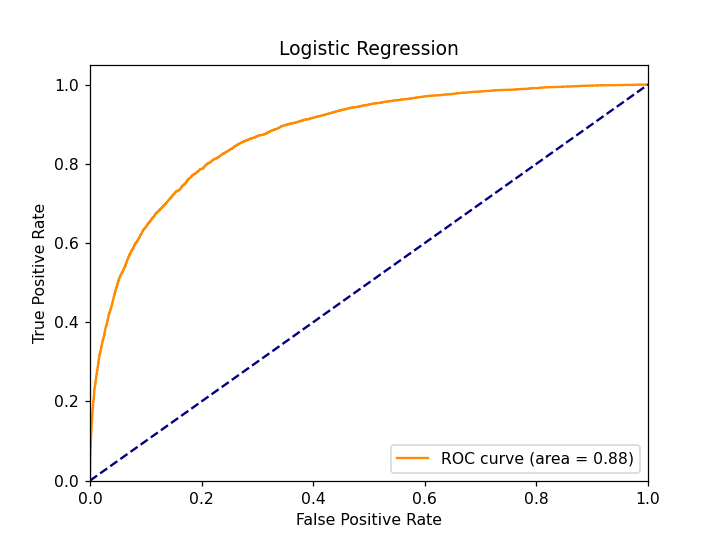

In [103]:
from sklearn.metrics import roc_curve, auc

y_predicted_proba = model.predict_proba(X_test) 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Предсказания с помощью метода k ближайших соседей

In [59]:
from sklearn.neighbors import KNeighborsClassifier 

In [60]:
# from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[num_data.columns])
# X_test_scaled = scaler.transform(X_test[num_data.columns])

# clf = KNeighborsClassifier()
# parametrs = {'n_neighbors' : range(4, 10, 2)}
# grid_search_cv_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5)
# grid_search_cv_clf.fit(X_train_scaled, y_train)
# grid_search_cv_clf.best_params_

In [61]:
KN_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('kn', KNeighborsClassifier())
])

model = KN_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     27882
           1       0.66      0.42      0.52      7667

    accuracy                           0.83     35549
   macro avg       0.76      0.68      0.71     35549
weighted avg       0.81      0.83      0.81     35549



<IPython.core.display.Javascript object>


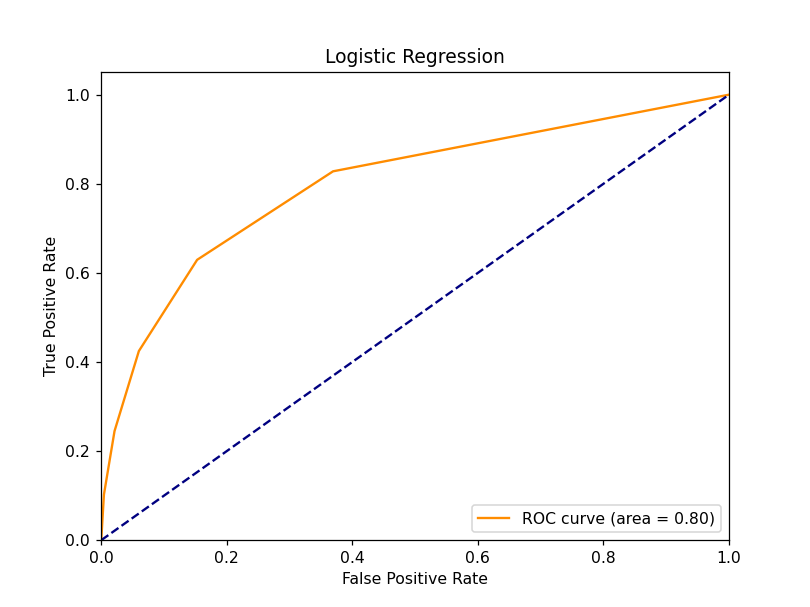

In [63]:
y_predicted_proba = model.predict_proba(X_test) 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KN')
plt.legend(loc="lower right")
plt.show()

### Предсказания с помощью Байесовского классификатора

In [104]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_data.columns]))

In [105]:
new_ohe = OneHotEncoder(categories='auto')
feature_arr = new_ohe.fit_transform(X[cat_columns.drop(['Date', 'Year', 'Day'])]).toarray()
feature_labels = new_ohe.get_feature_names()

feature_labels = np.array(feature_labels).ravel()

X_ohe = pd.DataFrame(feature_arr, columns=feature_labels)

In [114]:
X_ohe

,x0_Adelaide,x0_Albany,x0_Albury,x0_AliceSprings,x0_BadgerysCreek,x0_Ballarat,x0_Bendigo,x0_Brisbane,x0_Cairns,x0_Canberra,...,x5_03,x5_04,x5_05,x5_06,x5_07,x5_08,x5_09,x5_10,x5_11,x5_12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
X_transform = pd.concat([X_ohe, X_scaled], axis=1)

In [107]:
X_train_transform, X_test_transform, y_train, y_test = train_test_split(X_transform, y, test_size=0.25, shuffle=False)

In [111]:
from sklearn.naive_bayes import GaussianNB

B_pipeline = Pipeline(steps=[
    ('bayes', GaussianNB())
])

model = B_pipeline.fit(X_train_transform.to_numpy(), y_train)
y_pred = model.predict(X_test_transform.to_numpy())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     27882
           1       0.47      0.72      0.57      7667

    accuracy                           0.76     35549
   macro avg       0.69      0.75      0.70     35549
weighted avg       0.81      0.76      0.78     35549



<IPython.core.display.Javascript object>


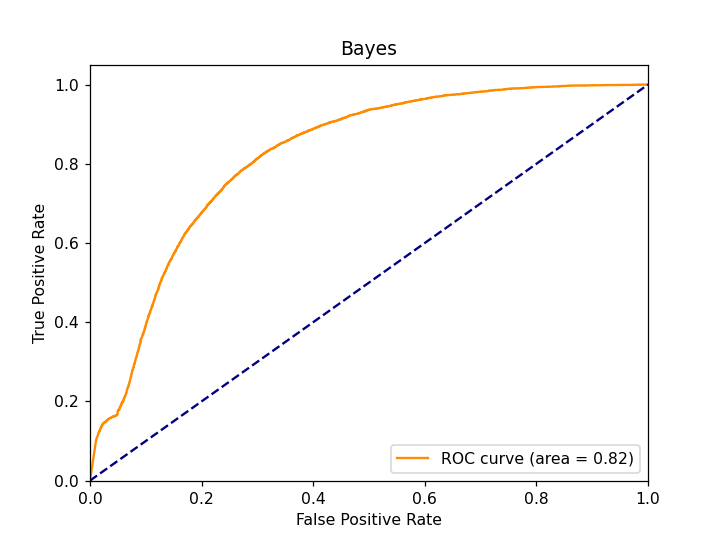

In [112]:
y_predicted_proba = model.predict_proba(X_test_transform) 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bayes')
plt.legend(loc="lower right")
plt.show()

### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [116]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [117]:
def probability(theta, X):
    return 1 / (1 + np.exp(-np.dot(X, theta.T)))

prob = probability(theta, X)

assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

In [118]:
prob

array([9.97527377e-01, 1.19202922e-01, 7.31058579e-01, 3.05902227e-07])

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [119]:
def binary_class_prediction(theta, X, threshold =.5):
    return (probability(theta, X) > threshold).astype(int)

y_pred = binary_class_prediction(theta, X)

assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

In [120]:
y_pred

array([1, 0, 1, 0])

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [121]:
def logloss(theta, X, y): 
    y = np.where(y == 1, 1, -1)
    return np.sum(np.log(1 + np.exp(-y * np.dot(X, theta.T)))) / y.size

In [122]:
logloss(theta, X, y)

0.8606664224002999

In [123]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [126]:
def gradient(theta, X, y):
    result = np.zeros(len(theta))
    for k in range(len(theta)):
        result[k] = np.sum(np.exp(-y*X.dot(theta))/(1 + np.exp(-y*X.dot(theta)))*(-y*X[:, k]))/len(y)
    
    return result

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

In [127]:
gradient(theta, X, y)

array([ 0.21958111,  0.43978038, -0.22081743])

In [162]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        if type(X) == pd.core.frame.DataFrame:
            X_batch = X.iloc[batch].to_numpy()
            y_batch = y.iloc[batch].to_numpy()
        else:
            X_batch = X[batch]
            y_batch = y[batch]
        

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [131]:
X, y = make_classification(n_samples=2000)

<IPython.core.display.Javascript object>


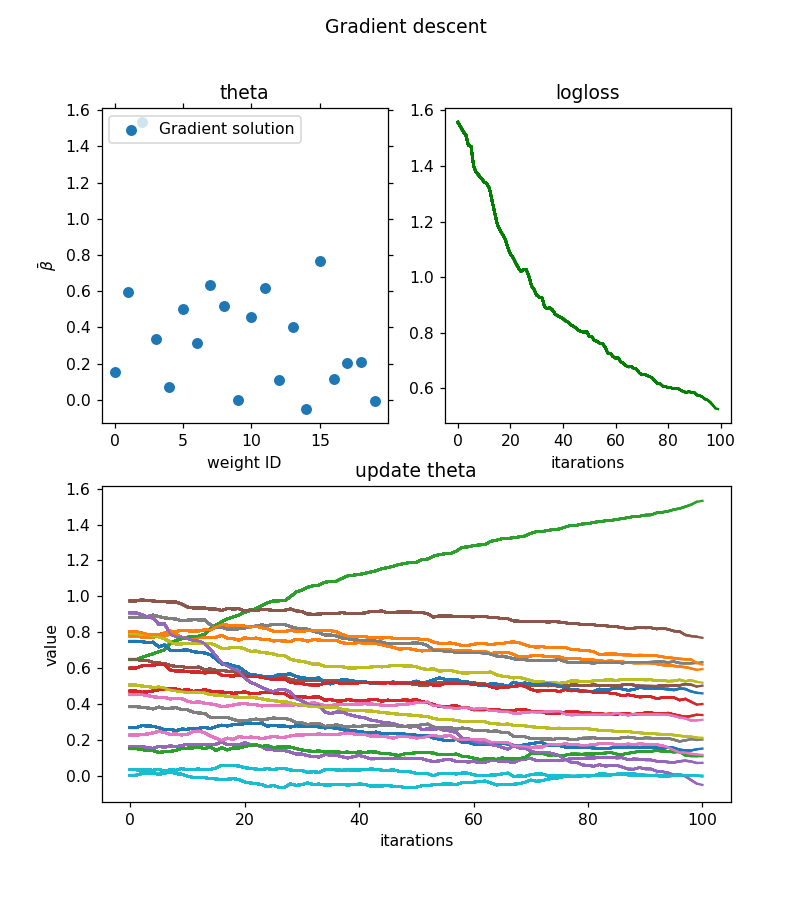

In [132]:
optimal_theta = fit(X, y)

In [133]:
y_pred = binary_class_prediction(optimal_theta, X)

In [138]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       997
           1       0.74      0.76      0.75      1003

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



### То же самое для погоды

<IPython.core.display.Javascript object>


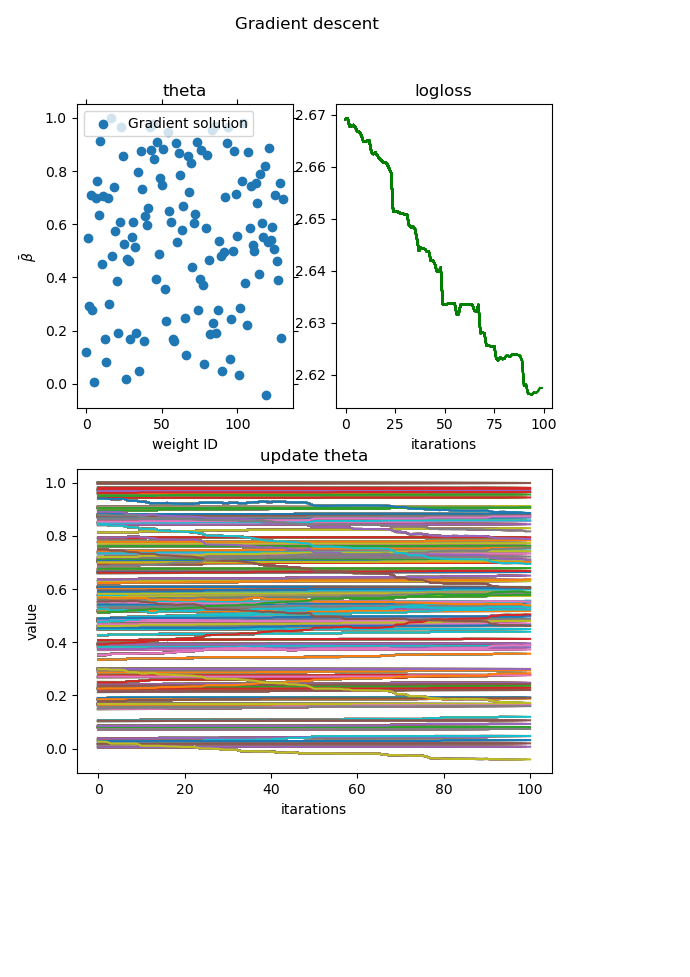

In [163]:
weather_theta = fit(X_train_transform, y_train)

In [164]:
y_pred = binary_class_prediction(weather_theta, X_test_transform)

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.12      0.21     27882
           1       0.22      0.91      0.36      7667

    accuracy                           0.29     35549
   macro avg       0.53      0.52      0.28     35549
weighted avg       0.70      0.29      0.24     35549



<IPython.core.display.Javascript object>


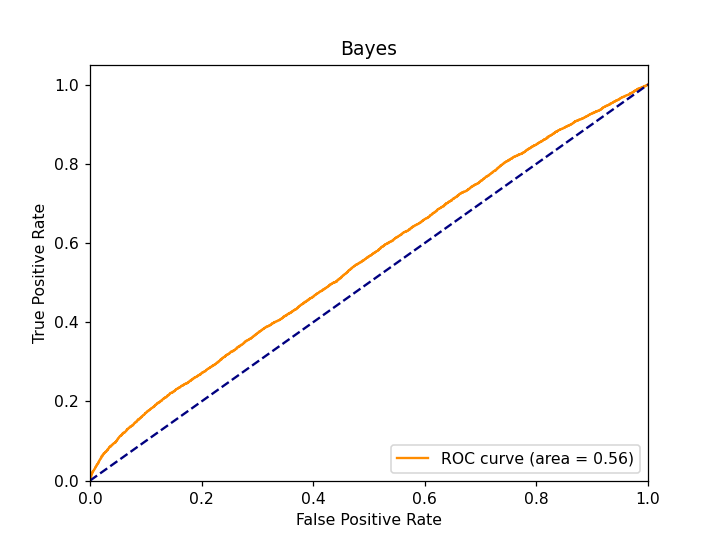

In [169]:
y_predicted_proba = probability(weather_theta, X_test_transform) 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bayes')
plt.legend(loc="lower right")
plt.show()

### Так как точность получилась не очень хорошей, попробую еще раз для большего числа итераций

In [170]:
weather_theta = fit(X_train_transform, y_train, iters=1000, plot=False)

In [171]:
y_pred = binary_class_prediction(weather_theta, X_test_transform)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.10      0.19     27882
           1       0.23      0.99      0.38      7667

    accuracy                           0.29     35549
   macro avg       0.61      0.55      0.28     35549
weighted avg       0.82      0.29      0.23     35549



<IPython.core.display.Javascript object>


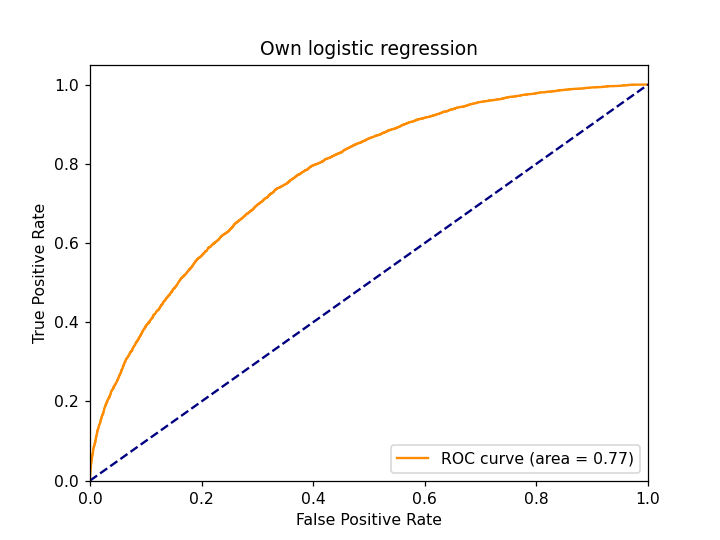

In [174]:
y_predicted_proba = probability(weather_theta, X_test_transform) 

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Own logistic regression')
plt.legend(loc="lower right")
plt.show()

**Общие результаты:**

 1. Логистическая регрессия: roc curve 0.88, time 1.8
 
 
 2. Метод k ближайщих соседей: roc curve 0.80, time очень долго
 
 
 3. Байесовский классификатор: roc curve 0.82, time 0.61
 
 
 4. Собственная реализация логистической регрессии: roc curve 0.77, time 367

**Вывод:** 
 1. Наиболее хороший результат предсказаний дал метод логистическая регрессия (площадь рок кривой 0.88). 


 2. Также стоит отметить скорость работы метода k ближайших соседей, так как на обучение было потрачено намного больше времени, чем в остальных методах, но итоговый результат это не окупило (площадь рок кривой 0.8).
 
 
 3. Наша собственная реализация логистической регрессии дала не лучший, но имеющий право на жизнь, результат (заметно улучшение предсказаний с увеличением числа итераций)